## Problem Statement

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will do the following purposes:

- Predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- Identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. 

- Recommend strategies to manage customer churn based on your observations.


### Data Initialization

In [1]:
#Import all the libraries need for the case study
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import metrics

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Set to show displayed columns and rows to maximum 500
pd.set_option('display.max_columns', 100)
pd.options.display.max_rows = 100

In [2]:
#Reading csv file and display the shape of the data set
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test (1).csv")
sample = pd.read_csv("solution (1).csv")
telecom_df = pd.read_csv("data_dictionary (1).csv")

print(train_df.shape)
print(test_df.shape)
print(sample.shape)
print(telecom_df.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


Train Dataset contains 69999 rows and 172 columns where test data set contains 30000 rows and 171 columns.

In [3]:
#Check the data what it holds
telecom_df.head(50)

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [4]:
#Checking out the information of the train data set
train_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [5]:
#Checking out the information of the test data set
test_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [6]:
#See what data it contains
train_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

We have integer, float and object data types.

In [7]:
#Check the column names in the data set
train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [8]:
#Check the column names in the test data set
test_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=171)

In [9]:
#Check what is the difference between train and test data set.
train_df.columns.difference(test_df.columns).tolist()

['churn_probability']

In [10]:
#Check the size of the train data set
train_df.size

12039828

In [11]:
#Check the data types
train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [12]:
#Check the dimension of the dataset.
print(train_df.ndim, test_df.ndim)

2 2


In [13]:
#Let us see how the data set looks like
train_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

## Data Cleaning
  Under Data cleaning, we have certain ways to follow:
- Checking duplicate values
- Fixing missing values
- Standardising Values
- Fix Invalid Values
- Filtering data

### Check Duplicate Values:

In [14]:
train_df_dup = train_df
train_df_dup.drop_duplicates(subset=None, inplace=True)

In [15]:
train_df.shape, train_df_dup.shape

((69999, 172), (69999, 172))

In [16]:
test_df_dup = test_df
test_df_dup.drop_duplicates(subset=None, inplace=True)

In [17]:
test_df.shape, test_df_dup.shape

((30000, 171), (30000, 171))

We dont have any duplicates in the train and test data set.

### Fixing Missing Values:

In [18]:
# Obtain the columns with unique values and drop those columns since these columns are not useful
# for our analysis
ucol=[]
for i in train_df.columns:
    if train_df[i].nunique() == 1:
        ucol.append(i)
    else:
        pass
print("\nColumns dropped from the dataset which have unique value\n",ucol)
train_df.drop(ucol, axis=1, inplace = True)
ucol


Columns dropped from the dataset which have unique value
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [19]:
train_df.shape,test_df.shape

((69999, 159), (30000, 171))

In [20]:
test_df.drop(ucol,axis=1, inplace=True)

In [21]:
train_df.shape, test_df.shape

((69999, 159), (30000, 158))

Check for the values in the columns which are unique and drop them off.

### Check for Null and Missing values:

In [22]:
#Check the number of Null values in each column using percentage for train data
(train_df.isnull().sum() / train_df.isnull().count()*100).sort_values(ascending=False).head(50)

arpu_3g_6                   74.902499
night_pck_user_6            74.902499
total_rech_data_6           74.902499
max_rech_data_6             74.902499
date_of_last_rech_data_6    74.902499
count_rech_2g_6             74.902499
av_rech_amt_data_6          74.902499
fb_user_6                   74.902499
count_rech_3g_6             74.902499
arpu_2g_6                   74.902499
total_rech_data_7           74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
max_rech_data_7             74.478207
count_rech_3g_7             74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
arpu_3g_7                   74.478207
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
max_rech_data_8             73.689624
count_rech_2g_8             73.689624
count_rech_3g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_us

In [23]:
#Check the number of Null values in each column using percentage for test data
(test_df.isnull().sum() / test_df.isnull().count()*100).sort_values(ascending=False).head(30)

count_rech_3g_6             74.716667
arpu_2g_6                   74.716667
fb_user_6                   74.716667
date_of_last_rech_data_6    74.716667
night_pck_user_6            74.716667
arpu_3g_6                   74.716667
total_rech_data_6           74.716667
av_rech_amt_data_6          74.716667
max_rech_data_6             74.716667
count_rech_2g_6             74.716667
arpu_3g_7                   74.313333
fb_user_7                   74.313333
night_pck_user_7            74.313333
total_rech_data_7           74.313333
max_rech_data_7             74.313333
count_rech_2g_7             74.313333
date_of_last_rech_data_7    74.313333
av_rech_amt_data_7          74.313333
arpu_2g_7                   74.313333
count_rech_3g_7             74.313333
count_rech_2g_8             73.593333
night_pck_user_8            73.593333
arpu_2g_8                   73.593333
av_rech_amt_data_8          73.593333
date_of_last_rech_data_8    73.593333
fb_user_8                   73.593333
arpu_3g_8   

In [24]:
# Again checking percent of missing values in columns
df_missing_columns = (round(((train_df.isnull().sum()/len(train_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
arpu_3g_6                 74.9
night_pck_user_6          74.9
total_rech_data_6         74.9
max_rech_data_6           74.9
date_of_last_rech_data_6  74.9
...                        ...
vol_2g_mb_6                0.0
vol_2g_mb_7                0.0
vol_2g_mb_8                0.0
vol_3g_mb_6                0.0
churn_probability          0.0

[159 rows x 1 columns]

In [25]:
# Listing the columns with missing values > 70
missing_list= (((df_missing_columns[df_missing_columns['null'] >= 70]).index).to_list())
print(missing_list)

['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'max_rech_data_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'av_rech_amt_data_6', 'fb_user_6', 'count_rech_3g_6', 'arpu_2g_6', 'total_rech_data_7', 'fb_user_7', 'count_rech_2g_7', 'max_rech_data_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_2g_7', 'night_pck_user_7', 'date_of_last_rech_data_7', 'arpu_3g_7', 'total_rech_data_8', 'arpu_2g_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'night_pck_user_8', 'fb_user_8', 'arpu_3g_8', 'date_of_last_rech_data_8']


In [26]:
#Check the details of the columns with the missing values.
train_df[missing_list].describe().T

count        mean         std    min   25%     50%  \
arpu_3g_6           17568.0   90.069931  193.600413 -20.38   0.0    0.52   
night_pck_user_6    17568.0    0.025273    0.156958   0.00   0.0    0.00   
total_rech_data_6   17568.0    2.467612    2.794610   1.00   1.0    1.00   
max_rech_data_6     17568.0  126.500000  109.352573   1.00  25.0  145.00   
count_rech_2g_6     17568.0    1.865323    2.566377   0.00   1.0    1.00   
av_rech_amt_data_6  17568.0  192.831096  190.623115   1.00  82.0  154.00   
fb_user_6           17568.0    0.916325    0.276907   0.00   1.0    1.00   
count_rech_3g_6     17568.0    0.602288    1.279297   0.00   0.0    0.00   
arpu_2g_6           17568.0   86.863900  171.321203 -35.83   0.0   11.30   
total_rech_data_7   17865.0    2.679989    3.073472   1.00   1.0    2.00   
fb_user_7           17865.0    0.909544    0.286842   0.00   1.0    1.00   
count_rech_2g_7     17865.0    2.056311    2.799916   0.00   1.0    1.00   
max_rech_data_7     17865.0  126.402071  109.459266   1.00  25.0  145.00   
count_rech_3g_7     17865.0    0.623678    1.401230   0.00   0.0    0.00   
av_rech_amt_data_7  17865.0  201.455940  198.346141   1.00  92.0  154.00   
arpu_2g_7           17865.0   85.846074  178.067280 -13.09   0.0    8.80   
night_pck_user_7    17865.0    0.024069    0.153269   0.00   0.0    0.00   
arpu_3g_7           17865.0   89.115767  195.826990 -26.04   0.0    0.42   
total_rech_data_8   18417.0    2.652441    3.101265   1.00   1.0    1.00   
arpu_2g_8           18417.0   86.348404  170.297094 -55.83   0.0    9.09   
max_rech_data_8     18417.0  125.374925  109.648799   1.00  25.0  145.00   
count_rech_2g_8     18417.0    2.016018    2.728246   0.00   1.0    1.00   
count_rech_3g_8     18417.0    0.636423    1.457058   0.00   0.0    0.00   
av_rech_amt_data_8  18417.0  196.815792  192.280532   1.00  84.0  154.00   
night_pck_user_8    18417.0    0.021013    0.143432   0.00   0.0    0.00   
fb_user_8           18417.0    0.890319    0.312501   0.00   1.0    1.00   
arpu_3g_8           18417.0   90.618564  189.907986 -24.49   0.0    0.84   

                       75%      max  
arpu_3g_6           122.07  5054.37  
night_pck_user_6      0.00     1.00  
total_rech_data_6     3.00    61.00  
max_rech_data_6     177.00  1555.00  
count_rech_2g_6       2.00    42.00  
av_rech_amt_data_6  252.00  5920.00  
fb_user_6             1.00     1.00  
count_rech_3g_6       1.00    29.00  
arpu_2g_6           122.07  5054.35  
total_rech_data_7     3.00    54.00  
fb_user_7             1.00     1.00  
count_rech_2g_7       2.00    48.00  
max_rech_data_7     177.00  1555.00  
count_rech_3g_7       1.00    34.00  
av_rech_amt_data_7  252.00  4365.00  
arpu_2g_7           122.07  4809.36  
night_pck_user_7      0.00     1.00  
arpu_3g_7           120.86  4980.90  
total_rech_data_8     3.00    60.00  
arpu_2g_8           122.07  3483.17  
max_rech_data_8     179.00  1555.00  
count_rech_2g_8       2.00    44.00  
count_rech_3g_8       1.00    45.00  
av_rech_amt_data_8  252.00  4076.00  
night_pck_user_8      0.00     1.00  
fb_user_8             1.00     1.00  
arpu_3g_8           122.07  3716.90

We see that many columns contains null/NaN values. So we need to impute the values and fill it.

In [27]:
#Analyze the June month how the data is. So obtain all the columns of the month June and analyze the data.
month_6_columns=train_df.filter(regex='_6',axis=1).columns
print(month_6_columns)

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6',
       'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
       'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6',
       'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6

In [28]:
#Let us analyze how the data recharge data set contains.
train_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6']].head(20)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
0                       NaN                NaN              NaN   
1                       NaN                NaN              NaN   
2                       NaN                NaN              NaN   
3                       NaN                NaN              NaN   
4                 6/25/2014                7.0             25.0   
5                       NaN                NaN              NaN   
6                       NaN                NaN              NaN   
7                 6/20/2014                1.0            198.0   
8                       NaN                NaN              NaN   
9                       NaN                NaN              NaN   
10                6/29/2014                1.0             98.0   
11                      NaN                NaN              NaN   
12                      NaN                NaN              NaN   
13                      NaN                NaN              NaN   
14                      NaN                NaN              NaN   
15                6/16/2014                1.0            154.0   
16                6/19/2014                1.0            145.0   
17                      NaN                NaN              NaN   
18                      NaN                NaN              NaN   
19                      NaN                NaN              NaN   

    count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
0               NaN              NaN                 NaN  
1               NaN              NaN                 NaN  
2               NaN              NaN                 NaN  
3               NaN              NaN                 NaN  
4               7.0              0.0               175.0  
5               NaN              NaN                 NaN  
6               NaN              NaN                 NaN  
7               1.0              0.0               198.0  
8               NaN              NaN                 NaN  
9               NaN              NaN                 NaN  
10              1.0              0.0                98.0  
11              NaN              NaN                 NaN  
12              NaN              NaN                 NaN  
13              NaN              NaN                 NaN  
14              NaN              NaN                 NaN  
15              1.0              0.0               154.0  
16              0.0              1.0               145.0  
17              NaN              NaN                 NaN  
18              NaN              NaN                 NaN  
19              NaN              NaN                 NaN

We can see that if the value is not available for the data recharge it is filled with NaN. So we can fill it with 0.

In [29]:
# create a list of recharge columns where we will impute missing values with zeroes
month_rech_data_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                      ]

In [30]:
# impute missing values with 0
train_df[month_rech_data_col] = train_df[month_rech_data_col].apply(lambda x: x.fillna(0))

In [31]:
#Impute the same for the test data
test_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6']].head(20)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
0                       NaN                NaN              NaN   
1                       NaN                NaN              NaN   
2                       NaN                NaN              NaN   
3                       NaN                NaN              NaN   
4                       NaN                NaN              NaN   
5                       NaN                NaN              NaN   
6                       NaN                NaN              NaN   
7                       NaN                NaN              NaN   
8                       NaN                NaN              NaN   
9                       NaN                NaN              NaN   
10                      NaN                NaN              NaN   
11                      NaN                NaN              NaN   
12                      NaN                NaN              NaN   
13                      NaN                NaN              NaN   
14                      NaN                NaN              NaN   
15                      NaN                NaN              NaN   
16                      NaN                NaN              NaN   
17                6/19/2014                1.0            154.0   
18                      NaN                NaN              NaN   
19                      NaN                NaN              NaN   

    count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
0               NaN              NaN                 NaN  
1               NaN              NaN                 NaN  
2               NaN              NaN                 NaN  
3               NaN              NaN                 NaN  
4               NaN              NaN                 NaN  
5               NaN              NaN                 NaN  
6               NaN              NaN                 NaN  
7               NaN              NaN                 NaN  
8               NaN              NaN                 NaN  
9               NaN              NaN                 NaN  
10              NaN              NaN                 NaN  
11              NaN              NaN                 NaN  
12              NaN              NaN                 NaN  
13              NaN              NaN                 NaN  
14              NaN              NaN                 NaN  
15              NaN              NaN                 NaN  
16              NaN              NaN                 NaN  
17              1.0              0.0               154.0  
18              NaN              NaN                 NaN  
19              NaN              NaN                 NaN

In [32]:
#Verify whether the imputed values are reflected.
train_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6']].head(20)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
0                       NaN                0.0              0.0   
1                       NaN                0.0              0.0   
2                       NaN                0.0              0.0   
3                       NaN                0.0              0.0   
4                 6/25/2014                7.0             25.0   
5                       NaN                0.0              0.0   
6                       NaN                0.0              0.0   
7                 6/20/2014                1.0            198.0   
8                       NaN                0.0              0.0   
9                       NaN                0.0              0.0   
10                6/29/2014                1.0             98.0   
11                      NaN                0.0              0.0   
12                      NaN                0.0              0.0   
13                      NaN                0.0              0.0   
14                      NaN                0.0              0.0   
15                6/16/2014                1.0            154.0   
16                6/19/2014                1.0            145.0   
17                      NaN                0.0              0.0   
18                      NaN                0.0              0.0   
19                      NaN                0.0              0.0   

    count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
0               NaN              NaN                 0.0  
1               NaN              NaN                 0.0  
2               NaN              NaN                 0.0  
3               NaN              NaN                 0.0  
4               7.0              0.0               175.0  
5               NaN              NaN                 0.0  
6               NaN              NaN                 0.0  
7               1.0              0.0               198.0  
8               NaN              NaN                 0.0  
9               NaN              NaN                 0.0  
10              1.0              0.0                98.0  
11              NaN              NaN                 0.0  
12              NaN              NaN                 0.0  
13              NaN              NaN                 0.0  
14              NaN              NaN                 0.0  
15              1.0              0.0               154.0  
16              0.0              1.0               145.0  
17              NaN              NaN                 0.0  
18              NaN              NaN                 0.0  
19              NaN              NaN                 0.0

In [33]:
# impute missing values with 0
test_df[month_rech_data_col] = test_df[month_rech_data_col].apply(lambda x: x.fillna(0))

In [34]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6, 7 and 8
train_df.drop(['count_rech_2g_6','count_rech_3g_6',
               'count_rech_2g_7','count_rech_3g_7',
               'count_rech_2g_8','count_rech_3g_8',
              ],axis=1, inplace=True)

print("The count of recharge for 2G and 3G is dropped as they can be explained from the 'total_rech_data'column")

The count of recharge for 2G and 3G is dropped as they can be explained from the 'total_rech_data'column


In [35]:
#Check the shape after drop
train_df.shape

(69999, 153)

In [36]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6, 7 and 8 for test data
test_df.drop(['count_rech_2g_6','count_rech_3g_6',
               'count_rech_2g_7','count_rech_3g_7',
               'count_rech_2g_8','count_rech_3g_8',
              ],axis=1, inplace=True)

print("The count of recharge for 2G and 3G is dropped as they can be explained from the 'total_rech_data'column")

The count of recharge for 2G and 3G is dropped as they can be explained from the 'total_rech_data'column


In [37]:
# Dropping the columns 'date_of_last_rech_data_*' for the months 6, 7 and 8
train_df.drop(['date_of_last_rech_data_6',
               'date_of_last_rech_data_7',
               'date_of_last_rech_data_8'],axis=1, inplace=True)
test_df.drop(['date_of_last_rech_data_6',
               'date_of_last_rech_data_7',
               'date_of_last_rech_data_8'],axis=1, inplace=True)
print("The date of last recharge for data is dropped as they don't determine the churn of the customer")

The date of last recharge for data is dropped as they don't determine the churn of the customer


In [38]:
#Check the number of Null values in each column using percentage
(train_df.isnull().sum() / train_df.isnull().count()*100).sort_values(ascending=False).head(20)

night_pck_user_6    74.902499
arpu_3g_6           74.902499
fb_user_6           74.902499
arpu_2g_6           74.902499
fb_user_7           74.478207
arpu_3g_7           74.478207
night_pck_user_7    74.478207
arpu_2g_7           74.478207
night_pck_user_8    73.689624
fb_user_8           73.689624
arpu_3g_8           73.689624
arpu_2g_8           73.689624
isd_og_mou_8         5.290076
std_og_t2m_mou_8     5.290076
loc_og_mou_8         5.290076
std_ic_t2m_mou_8     5.290076
std_og_t2t_mou_8     5.290076
std_ic_t2t_mou_8     5.290076
std_og_t2f_mou_8     5.290076
loc_ic_mou_8         5.290076
dtype: float64

Still we have missing values in certain columns which needs imputation.

In [39]:
#Check the number of Null values in each column using percentage for test data
(test_df.isnull().sum() / test_df.isnull().count()*100).sort_values(ascending=False).head(20)

night_pck_user_6    74.716667
arpu_3g_6           74.716667
arpu_2g_6           74.716667
fb_user_6           74.716667
arpu_2g_7           74.313333
arpu_3g_7           74.313333
fb_user_7           74.313333
night_pck_user_7    74.313333
fb_user_8           73.593333
arpu_2g_8           73.593333
arpu_3g_8           73.593333
night_pck_user_8    73.593333
std_og_t2t_mou_8     5.583333
isd_ic_mou_8         5.583333
loc_ic_t2t_mou_8     5.583333
std_og_t2m_mou_8     5.583333
loc_og_mou_8         5.583333
std_ic_t2m_mou_8     5.583333
loc_og_t2c_mou_8     5.583333
std_og_t2f_mou_8     5.583333
dtype: float64

In [40]:
#Analyze how arpu_* column
train_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(20)

arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
0         NaN        NaN                 0.0
1         NaN        NaN                 0.0
2         NaN        NaN                 0.0
3         NaN        NaN                 0.0
4        0.00       0.00               175.0
5         NaN        NaN                 0.0
6         NaN        NaN                 0.0
7        0.00       0.00               198.0
8         NaN        NaN                 0.0
9         NaN        NaN                 0.0
10     202.27      14.38                98.0
11        NaN        NaN                 0.0
12        NaN        NaN                 0.0
13        NaN        NaN                 0.0
14        NaN        NaN                 0.0
15       0.00     164.75               154.0
16     122.58     122.07               145.0
17        NaN        NaN                 0.0
18        NaN        NaN                 0.0
19        NaN        NaN                 0.0

We see that when the values are 0 in the recharge amount for data, then arpu_* fields contain NaN values. So we can impute it with zeroes.

In [41]:
# create a list of arpu columns where we will impute missing values with zeroes
arpu_col = ['arpu_3g_6', 'arpu_2g_6','arpu_3g_7', 'arpu_2g_7','arpu_3g_8', 'arpu_2g_8']
# impute missing values with 0
train_df[arpu_col] = train_df[arpu_col].apply(lambda x: x.fillna(0))

In [42]:
#Apply the same to the test data
test_df[arpu_col] = test_df[arpu_col].apply(lambda x: x.fillna(0))

In [43]:
#Check the number of Null values in each column using percentage
(train_df.isnull().sum() / train_df.isnull().count()*100).sort_values(ascending=False).head(20)

night_pck_user_6    74.902499
fb_user_6           74.902499
night_pck_user_7    74.478207
fb_user_7           74.478207
night_pck_user_8    73.689624
fb_user_8           73.689624
std_ic_t2f_mou_8     5.290076
std_og_t2t_mou_8     5.290076
std_ic_t2t_mou_8     5.290076
loc_og_t2c_mou_8     5.290076
loc_ic_mou_8         5.290076
loc_og_mou_8         5.290076
loc_ic_t2f_mou_8     5.290076
loc_ic_t2t_mou_8     5.290076
loc_ic_t2m_mou_8     5.290076
isd_og_mou_8         5.290076
std_og_t2m_mou_8     5.290076
std_og_t2f_mou_8     5.290076
og_others_8          5.290076
std_og_mou_8         5.290076
dtype: float64

In [44]:
#Check the number of Null values in each column using percentage
(test_df.isnull().sum() / test_df.isnull().count()*100).sort_values(ascending=False).head(20)

night_pck_user_6    74.716667
fb_user_6           74.716667
night_pck_user_7    74.313333
fb_user_7           74.313333
night_pck_user_8    73.593333
fb_user_8           73.593333
std_og_t2t_mou_8     5.583333
isd_og_mou_8         5.583333
loc_og_t2c_mou_8     5.583333
loc_og_mou_8         5.583333
std_ic_mou_8         5.583333
std_og_t2m_mou_8     5.583333
std_og_t2f_mou_8     5.583333
std_og_mou_8         5.583333
std_ic_t2f_mou_8     5.583333
og_others_8          5.583333
spl_og_mou_8         5.583333
loc_og_t2f_mou_8     5.583333
std_ic_t2m_mou_8     5.583333
loc_ic_t2t_mou_8     5.583333
dtype: float64

In [45]:
#Check the night_pck_user_6 data
train_df.night_pck_user_6.describe()

count    17568.000000
mean         0.025273
std          0.156958
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

In [46]:
#Check the night_pck_user_6 data
train_df.fb_user_6.describe()

count    17568.000000
mean         0.916325
std          0.276907
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_6, dtype: float64

In [47]:
night_fb_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                  'fb_user_6', 'fb_user_7','fb_user_8']
# replace missing values with '-1' in night pack and facebook columns
train_df[night_fb_cols] = train_df[night_fb_cols].apply(lambda x: x.fillna(-1))

In [48]:
# replace missing values with '-1' in night pack and facebook columns
test_df[night_fb_cols] = test_df[night_fb_cols].apply(lambda x: x.fillna(-1))

Fill the missing value in night pack and fb user with -1.

In [49]:
#Check the number of Null values in each column using percentage
(train_df.isnull().sum() / train_df.isnull().count()*100).sort_values(ascending=False).head(20)

std_ic_t2f_mou_8    5.290076
std_ic_t2t_mou_8    5.290076
isd_og_mou_8        5.290076
std_og_t2m_mou_8    5.290076
spl_og_mou_8        5.290076
std_og_t2t_mou_8    5.290076
og_others_8         5.290076
loc_og_mou_8        5.290076
loc_ic_t2t_mou_8    5.290076
loc_og_t2c_mou_8    5.290076
loc_ic_t2m_mou_8    5.290076
loc_og_t2f_mou_8    5.290076
loc_ic_t2f_mou_8    5.290076
loc_og_t2m_mou_8    5.290076
std_og_mou_8        5.290076
loc_og_t2t_mou_8    5.290076
loc_ic_mou_8        5.290076
std_og_t2f_mou_8    5.290076
std_ic_t2m_mou_8    5.290076
ic_others_8         5.290076
dtype: float64

In [50]:
#Check the number of Null values in each column using percentage
(test_df.isnull().sum() / test_df.isnull().count()*100).sort_values(ascending=False).head(20)

loc_ic_t2f_mou_8    5.583333
spl_ic_mou_8        5.583333
std_og_t2f_mou_8    5.583333
std_ic_t2f_mou_8    5.583333
std_og_t2t_mou_8    5.583333
std_ic_t2m_mou_8    5.583333
loc_og_mou_8        5.583333
std_og_mou_8        5.583333
loc_og_t2c_mou_8    5.583333
std_ic_mou_8        5.583333
loc_og_t2f_mou_8    5.583333
isd_og_mou_8        5.583333
loc_og_t2m_mou_8    5.583333
spl_og_mou_8        5.583333
std_ic_t2t_mou_8    5.583333
loc_og_t2t_mou_8    5.583333
roam_og_mou_8       5.583333
offnet_mou_8        5.583333
ic_others_8         5.583333
loc_ic_t2m_mou_8    5.583333
dtype: float64

Most of the columns with higher missing values are imputed now.

In [51]:
train_df.shape, test_df.shape

((69999, 150), (30000, 149))

In [52]:
#Get all the categorical data present in the data set.
cat_var_cols = train_df.select_dtypes(include=['object']).columns
cat_var_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [53]:
# convert to datetime
for col in cat_var_cols:
    train_df[col] = pd.to_datetime(train_df[col])

### Standardising Values:

Convert the object into timestamp data for the colum which has date details.

In [54]:
# convert to datetime
cat_var_cols1 = train_df.select_dtypes(include=['object']).columns
for col in cat_var_cols1:
    test_df[col] = pd.to_datetime(test_df[col])

Obtain the interger and float columns in the data set.

In [55]:
#Get all the integer data present in the data set.
int_var_col = train_df.select_dtypes(include=['int64']).columns
int_var_col

Index(['id', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'churn_probability'],
      dtype='object')

In [56]:
#Get all the float data present in the data set.
float_var_col = train_df.select_dtypes(include=['float64']).columns
float_var_col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=120)

### Impute missing values using the Imputer:

In [57]:
#Obtain the columns with missing values for train data
missing_data_percent = train_df.isnull().any()
miss_col = missing_data_percent[missing_data_percent.gt(0)].index

In [58]:
#Obtain the columns with missing values for test data
missing_data_percent1 = test_df.isnull().any()
miss_col1 = missing_data_percent1[missing_data_percent1.gt(0)].index

In [59]:
#Check the shape
trained_df_filt = train_df[miss_col]
trained_df_filt.shape

(69999, 84)

In [60]:
#Check the shape
test_df_filt = test_df[miss_col1]
test_df_filt.shape

(30000, 84)

In [61]:
num_var = trained_df_filt.select_dtypes(include=['int64','float64']).columns

In [62]:
num_var1 = test_df_filt.select_dtypes(include=['int64','float64']).columns

Using MSNO barchart see how much missing values are there for the month June columns.

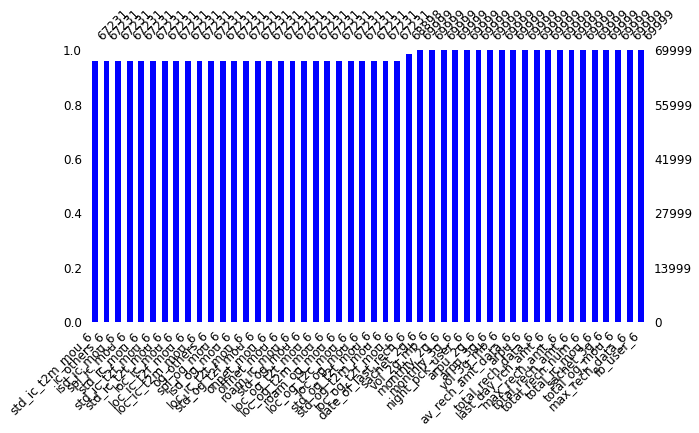

In [63]:
msno.bar(train_df.filter(like='_6'), color="blue", sort="ascending", figsize=(10,5), fontsize=12);

Use the Imputer to fill up the missing values automatically.

In [64]:
#Apply simple imputer for the train data
imp = SimpleImputer(strategy='constant', fill_value=0)
train_df[num_var] = imp.fit_transform(train_df[num_var])

In [65]:
#Apply simple imputer for the test data
imp1 = SimpleImputer(strategy='constant', fill_value=0)
test_df[num_var1] = imp.fit_transform(test_df[num_var1])

In [66]:
#Check for the missing values
(train_df.isnull().sum() / train_df.isnull().count()*100).sort_values(ascending=False)

date_of_last_rech_8    3.515765
date_of_last_rech_7    1.762882
date_of_last_rech_6    1.572880
id                     0.000000
total_rech_amt_6       0.000000
                         ...   
og_others_7            0.000000
og_others_8            0.000000
total_og_mou_6         0.000000
total_og_mou_7         0.000000
churn_probability      0.000000
Length: 150, dtype: float64

In [67]:
#Check for the missing values
(test_df.isnull().sum() / test_df.isnull().count()*100).sort_values(ascending=False)

date_of_last_rech_8    3.870000
date_of_last_rech_7    1.776667
date_of_last_rech_6    1.686667
id                     0.000000
total_rech_amt_6       0.000000
                         ...   
og_others_7            0.000000
og_others_8            0.000000
total_og_mou_6         0.000000
total_og_mou_7         0.000000
jun_vbc_3g             0.000000
Length: 149, dtype: float64

In [68]:
#Check for the categorical data
train_df[cat_var_cols].isna().sum()

date_of_last_rech_6    1101
date_of_last_rech_7    1234
date_of_last_rech_8    2461
dtype: int64

Let us analyze how to fill up the the date column with ohter data recharge columns.

In [69]:
# Check 'recharge' related columns of 6th month with missing 'date_of_last_rech_8' 
condition = train_df['date_of_last_rech_6'].isnull()
train_df[condition].filter(regex='.*rech.*6$', axis=1).head()

total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  \
28                  0                 0               0                 NaT   
95                  0                 0               0                 NaT   
293                 0                 0               0                 NaT   
351                 0                 0               0                 NaT   
498                 0                 0               0                 NaT   

     total_rech_data_6  max_rech_data_6  av_rech_amt_data_6  
28                 0.0              0.0                 0.0  
95                 0.0              0.0                 0.0  
293                0.0              0.0                 0.0  
351                0.0              0.0                 0.0  
498                0.0              0.0                 0.0

In [70]:
# Check 'recharge' related columns of 7th month with missing 'date_of_last_rech_7' 
condition = train_df['date_of_last_rech_7'].isnull()
train_df[condition].filter(regex='.*rech.*7$', axis=1).head()

total_rech_num_7  total_rech_amt_7  max_rech_amt_7 date_of_last_rech_7  \
31                  0                 0               0                 NaT   
76                  0                 0               0                 NaT   
136                 0                 0               0                 NaT   
188                 0                 0               0                 NaT   
241                 0                 0               0                 NaT   

     total_rech_data_7  max_rech_data_7  av_rech_amt_data_7  
31                 0.0              0.0                 0.0  
76                 0.0              0.0                 0.0  
136                0.0              0.0                 0.0  
188                0.0              0.0                 0.0  
241                0.0              0.0                 0.0

In [71]:
# impute missing values with 0
train_df[cat_var_cols] = train_df[cat_var_cols].apply(lambda x: x.fillna(0))

In [72]:
# impute missing values with 0
test_df[cat_var_cols] = test_df[cat_var_cols].apply(lambda x: x.fillna(0))

In [73]:
#Check the shape
train_df.shape,test_df.shape

((69999, 150), (30000, 149))

In [74]:
#Check for the null values.
(train_df.isnull().sum() / train_df.isnull().count()*100).sort_values(ascending=False)

id                   0.0
total_rech_amt_6     0.0
total_rech_amt_8     0.0
max_rech_amt_6       0.0
max_rech_amt_7       0.0
                    ... 
og_others_7          0.0
og_others_8          0.0
total_og_mou_6       0.0
total_og_mou_7       0.0
churn_probability    0.0
Length: 150, dtype: float64

In [75]:
# check for any null values after imputation for numerical columns
train_df.isnull().sum().sum()

0

In [76]:
# check for any null values after imputation for numerical columns
(test_df.isnull().sum() / test_df.isnull().count()*100).sort_values(ascending=False)

id                  0.0
total_rech_amt_6    0.0
total_rech_amt_8    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
                   ... 
og_others_7         0.0
og_others_8         0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
jun_vbc_3g          0.0
Length: 149, dtype: float64

In [77]:
# check for any null values after imputation for numerical columns
test_df.isnull().sum().sum()

0

In [78]:
#Check the churn count
train_df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

### Feature Engineering:
Obtain new columns to identify the high value customers. So calculate the totat data recharge amount, total amount spent on recharging and total monthly recharge for data and call.

In [79]:
# calculate the total data recharge amount for the month 6, 7 & 9 --> number of recharges * average recharge amount
train_df['total_data_rech_6'] = train_df.total_rech_data_6 * train_df.av_rech_amt_data_6
train_df['total_data_rech_7'] = train_df.total_rech_data_7 * train_df.av_rech_amt_data_7
train_df['total_data_rech_8'] = train_df.total_rech_data_8 * train_df.av_rech_amt_data_8

In [80]:
# calculate the total data recharge amount for the month 6, 7 & 9 --> number of recharges * average recharge amount
test_df['total_data_rech_6'] = test_df.total_rech_data_6 * test_df.av_rech_amt_data_6
test_df['total_data_rech_7'] = test_df.total_rech_data_7 * test_df.av_rech_amt_data_7
test_df['total_data_rech_8'] = test_df.total_rech_data_8 * test_df.av_rech_amt_data_8

In [81]:
train_df[['total_data_rech_8','total_data_rech_7','total_data_rech_8']].head()

total_data_rech_8  total_data_rech_7  total_data_rech_8
0                0.0                0.0                0.0
1                0.0              145.0                0.0
2                0.0                0.0                0.0
3                0.0                0.0                0.0
4              852.0             1337.0              852.0

In [82]:
#lets calculate total amount spent on recharging data(mobile internet) in the month
#multiply amount with number of times it was recharged for data 
train_df['total_rech_amt_data_6'] = train_df['total_data_rech_6']*train_df['av_rech_amt_data_6']
train_df['total_rech_amt_data_7'] = train_df['total_data_rech_7']*train_df['av_rech_amt_data_7']
train_df['total_rech_amt_data_8'] = train_df['total_data_rech_8']*train_df['av_rech_amt_data_8']

In [83]:
#lets calculate total amount spent on recharging data(mobile internet) in the month
#multiply amount with number of times it was recharged for data 
test_df['total_rech_amt_data_6'] = test_df['total_data_rech_6']*test_df['av_rech_amt_data_6']
test_df['total_rech_amt_data_7'] = test_df['total_data_rech_7']*test_df['av_rech_amt_data_7']
test_df['total_rech_amt_data_8'] = test_df['total_data_rech_8']*test_df['av_rech_amt_data_8']

In [84]:
#lets calculate total monthly recharge for data and call, so sum amounts spents on call and data recharge for the month.
train_df['total_month_rech_6'] = train_df['total_rech_amt_6']+train_df['total_rech_amt_data_6']
train_df['total_month_rech_7'] = train_df['total_rech_amt_7']+train_df['total_rech_amt_data_7']
train_df['total_month_rech_8'] = train_df['total_rech_amt_8']+train_df['total_rech_amt_data_8']

In [85]:
#lets calculate total monthly recharge for data and call, so sum amounts spents on call and data recharge for the month.
test_df['total_month_rech_6'] = test_df['total_rech_amt_6']+test_df['total_rech_amt_data_6']
test_df['total_month_rech_7'] = test_df['total_rech_amt_7']+test_df['total_rech_amt_data_7']
test_df['total_month_rech_8'] = test_df['total_rech_amt_8']+test_df['total_rech_amt_data_8']

We need to perform all imputation and data cleaning for the Test data set also.

In [86]:
#Check the shape for train and test data set.
train_df.shape,test_df.shape

((69999, 159), (30000, 158))

### High Value Customers:

In [87]:
#lets extract high value customers based on the average recharge amount in the first two months(6,7) (the good phase).
hv_train=train_df[train_df[['total_month_rech_6','total_month_rech_7']].mean(axis=1)> train_df[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)]

In [88]:
#lets get the number of features and observations in new dataset high value customers hv_cust.info()
print("There are total %d features." %hv_train.shape[1])
print("There are total %d observations." %hv_train.shape[0])

There are total 159 features.
There are total 20998 observations.


In [89]:
#See the data
hv_train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1    1    0.000  122.787   42.953         0.00         0.00         0.00   
4    4  240.708  128.191  101.565        21.28         4.83         6.13   
7    7  167.861  167.869  167.866         0.00         0.00         0.00   
10  10  445.826   18.310   24.690        16.54         0.00         0.00   
15  15  580.549  377.294  338.286        10.43        24.99       194.43   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
1           0.00         25.99         30.89           0.00            0.0   
4          56.99         38.11          9.63          53.64            0.0   
7           0.00          0.00          0.00           0.00            0.0   
10        104.81          8.16          2.36          18.56            0.0   
15        317.11        341.79        197.09           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
1             0.0           0.00            0.0            0.0   
4             0.0          15.73            0.0            0.0   
7             0.0           0.00            0.0            0.0   
10            0.0          20.30            0.0            0.0   
15            0.0           0.00            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
1               0.00              0.00              0.00              0.00   
4              10.16              4.83              6.13             36.74   
7               0.00              0.00              0.00              0.00   
10             16.54              0.00              0.00             47.36   
15             10.43             24.99            194.43            313.76   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
1               0.00              0.00              0.00              0.00   
4              19.88              4.61             11.99              1.23   
7               0.00              0.00              0.00              0.00   
10              1.44              0.00             25.98              0.00   
15            330.88            185.88              3.26             10.91   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
1               0.00               0.0             22.01             29.79   
4               5.01               0.0              9.85              0.00   
7               0.00               0.0              0.00              0.00   
10              0.00               0.0              0.00              0.00   
15              4.94               0.0              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
1           0.00          0.00          0.00               0.0   
4          58.91         25.94         15.76               0.0   
7           0.00          0.00          0.00               0.0   
10         89.89          1.44          0.00               0.0   
15        327.46        366.79        385.26               0.0   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
1                0.0               0.0              0.00              0.00   
4                0.0               0.0              4.35              0.00   
7                0.0               0.0              0.00              0.00   
10               0.0               0.0             11.16              6.71   
15               0.0               0.0              0.00              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
1               0.00               0.0               0.0              0.00   
4               0.00               0.0               0.0              0.00   
7               0.00               0.0               0.0              0.00   
10              2.36               0.0               0.0              0.00   
15              0.

In [90]:
#Check the correlation
hv_train.corr()

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
id                     1.000000 -0.001565  0.003586  0.004209     0.002534   
arpu_6                -0.001565  1.000000  0.780478  0.721388     0.394496   
arpu_7                 0.003586  0.780478  1.000000  0.828097     0.312321   
arpu_8                 0.004209  0.721388  0.828097  1.000000     0.247948   
onnet_mou_6            0.002534  0.394496  0.312321  0.247948     1.000000   
...                         ...       ...       ...       ...          ...   
total_rech_amt_data_7  0.000049  0.092421  0.194543  0.112734    -0.005012   
total_rech_amt_data_8  0.010613  0.085739  0.108229  0.187625     0.005801   
total_month_rech_6     0.001368  0.154044  0.085829  0.081299    -0.007943   
total_month_rech_7     0.000050  0.092652  0.194830  0.112982    -0.004917   
total_month_rech_8     0.010613  0.085927  0.108446  0.187878     0.005865   

                       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
id                        0.005868     0.000864     -0.009627     -0.007886   
arpu_6                    0.315381     0.280105      0.575526      0.466557   
arpu_7                    0.369698     0.326398      0.477133      0.557702   
arpu_8                    0.292595     0.362091      0.404536      0.457960   
onnet_mou_6               0.796953     0.679248      0.234231      0.192621   
...                            ...          ...           ...           ...   
total_rech_amt_data_7    -0.003446     0.020983     -0.010285     -0.004753   
total_rech_amt_data_8    -0.001146     0.015812      0.005692      0.003060   
total_month_rech_6       -0.010718    -0.006353     -0.002224     -0.008427   
total_month_rech_7       -0.003333     0.021083     -0.010141     -0.004582   
total_month_rech_8       -0.001070     0.015906      0.005798      0.003180   

                       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                        -0.005441      -0.003365      -0.011671   
arpu_6                     0.418824       0.172650       0.116280   
arpu_7                     0.487333       0.135822       0.120849   
arpu_8                     0.560044       0.119910       0.104079   
onnet_mou_6                0.180886       0.074841       0.059589   
...                             ...            ...            ...   
total_rech_amt_data_7     -0.002838      -0.000034       0.000054   
total_rech_amt_data_8      0.041501       0.001312       0.001127   
total_month_rech_6         0.000531      -0.004900       0.001020   
total_month_rech_7        -0.002688       0.000007       0.000091   
total_month_rech_8         0.041647       0.001343       0.001153   

                       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
id                          0.003372      -0.007187      -0.010872   
arpu_6                      0.109826       0.242049       0.190050   
arpu_7                      0.107531       0.188249       0.217374   
arpu_8                      0.117622       0.166923       0.184565   
onnet_mou_6                 0.083842       0.138910       0.127772   
...                              ...            ...            ...   
total_rech_amt_data_7       0.005552      -0.002861       0.005230   
total_rech_amt_data_8      -0.001550       0.003075       0.021022   
total_month_rech_6          0.001154      -0.006425      -0.000211   
total_month_rech_7          0.005585      -0.002802       0.005297   
total_month_rech_8         -0.001519       0.003119       0.021069   

                       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
id                         -0.001605         -0.002490          0.004157   
arpu_6                      0.156899          0.211053          0.181949   
arpu_7                      0.176754          0.164309          0.201759   
arpu_8                      0.212594          0.148484          0.173197   
onnet_mou_6                 0.113203          0.561279          0.447022   
...              

In [91]:
#Check the spread of the data
hv_train.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  20998.000000  20998.000000  20998.000000  20998.000000  20998.000000   
mean   35056.285122    417.415979    419.389019    392.112900    147.735864   
std    20228.798252    492.709098    514.575405    517.812072    383.693394   
min        1.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17467.250000    155.559250    156.371750    130.431000      2.460000   
50%    35163.500000    292.483000    291.582000    269.827500     26.000000   
75%    52499.500000    529.401750    529.050250    507.964500    114.770000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  20998.000000  20998.000000  20998.000000  20998.000000  20998.000000   
mean     152.051757    138.006980    231.884362    232.982560    214.346009   
std      407.782826    386.879585    424.889135    431.859016    396.940095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.265000      1.260000     19.215000     18.282500     12.515000   
50%       24.800000     22.020000     89.570000     86.995000     78.205000   
75%      113.427500    103.182500    259.090000    258.527500    244.962500   
max     8157.780000  10752.560000   8362.360000   7043.980000   7857.780000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   20998.000000   20998.000000   20998.000000   20998.000000   
mean       11.774866       8.943555       9.083183      18.552713   
std        62.005353      62.676546      64.145475     103.638343   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    2933.080000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   20998.000000   20998.000000      20998.000000      20998.000000   
mean       13.281930      13.220692         61.734213         62.569664   
std        82.063386      92.131447        209.842714        221.732508   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.660000          0.700000   
50%         0.000000       0.000000         11.490000         11.300000   
75%         0.000000       0.000000         46.775000         47.325000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      20998.000000      20998.000000      20998.000000      20998.000000   
mean          58.483959        112.622595        110.824373        106.822520   
std          215.266300        215.540912        203.602026        197.799088   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.250000          6.010000          5.940000          3.740000   
50%           10.210000         41.190000         40.620000         37.990000   
75%           45.340000        129.332500        127.762500        125.552500   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      20998.000000      20998.000000      20998.000000      20998.000000   
mean           4.705756          4.728086          4.442398          1.453870   
std           16.955088         17.077236         15.759512          5.688353   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000  

## Univariate Analysis:

In [92]:
# create plotting functions
def dtype(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

In [93]:
def Univariate_Plot(variable, stats=True):
    
    if dtype(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif dtype(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())   

count    20998.000000
mean       417.415979
std        492.709098
min      -2258.709000
25%        155.559250
50%        292.483000
75%        529.401750
max      27731.088000
Name: arpu_6, dtype: float64


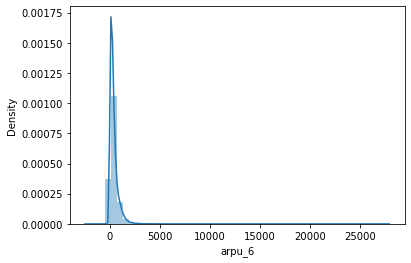

In [94]:
#Plot the data for the arpu
Univariate_Plot(hv_train.arpu_6)

count    20998.000000
mean       147.735864
std        383.693394
min          0.000000
25%          2.460000
50%         26.000000
75%        114.770000
max       7376.710000
Name: onnet_mou_6, dtype: float64


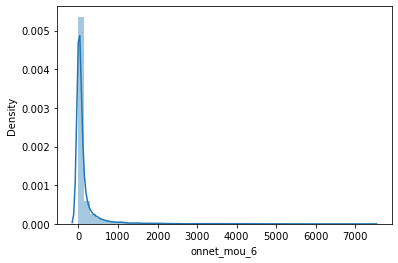

In [95]:
#Plot the data for the online net
Univariate_Plot(hv_train.onnet_mou_6)

count    69999.000000
mean       191.010582
std        312.900706
min          0.000000
25%         28.790000
50%         89.810000
75%        223.540000
max       8362.360000
Name: offnet_mou_6, dtype: float64


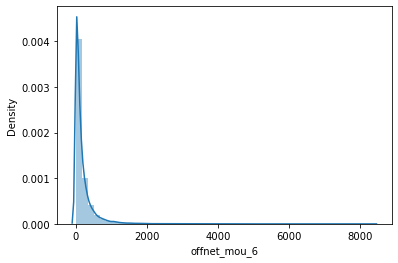

In [96]:
#Plot the data for the offline net
Univariate_Plot(train_df.offnet_mou_6)

count    20998.000000
mean        11.774866
std         62.005353
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2613.310000
Name: roam_ic_mou_6, dtype: float64


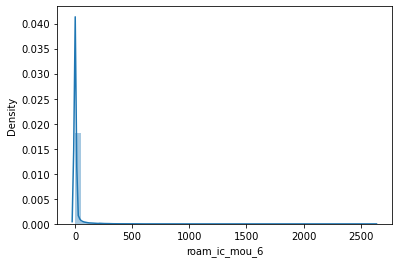

In [97]:
#Plot the data for the roaming incoming
Univariate_Plot(hv_train.roam_ic_mou_6)

count    20998.000000
mean        78.807321
std        310.231511
min          0.000000
25%          0.000000
50%          0.000000
75%         14.830000
max       7366.580000
Name: std_og_t2t_mou_6, dtype: float64


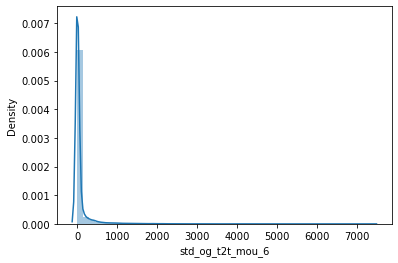

In [98]:
#Plot the data for the std outgoing calls
Univariate_Plot(hv_train.std_og_t2t_mou_6)

count    20998.000000
mean       169.300076
std        360.223616
min          0.000000
25%          0.000000
50%         22.215000
75%        176.860000
max      10285.900000
Name: vol_2g_mb_6, dtype: float64


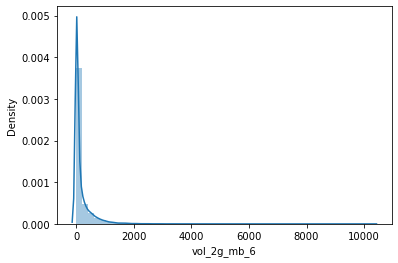

In [99]:
#Plot the data for the volume of 2G data
Univariate_Plot(hv_train.vol_2g_mb_6)

count    20998.000000
mean       160.117314
std        189.327545
min          0.000000
25%         25.000000
50%        149.000000
75%        223.000000
max       5920.000000
Name: av_rech_amt_data_6, dtype: float64


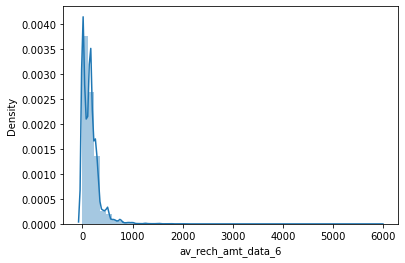

In [100]:
#Plot the data for the avaerage recharge amount
Univariate_Plot(hv_train.av_rech_amt_data_6)

<AxesSubplot:xlabel='night_pck_user_6', ylabel='Count'>

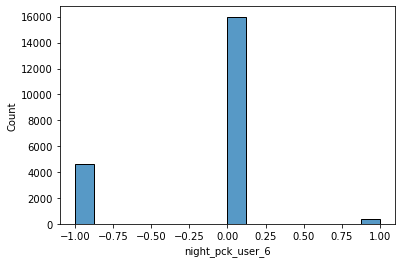

In [101]:
#Plot the data for the nightly package users
sns.histplot(hv_train.night_pck_user_6)

<AxesSubplot:xlabel='churn_probability', ylabel='Count'>

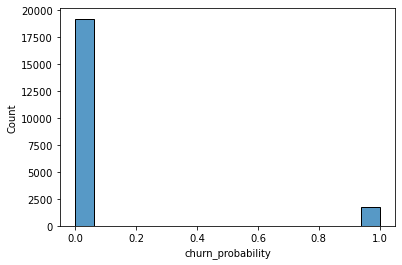

In [102]:
#Plot the data for the churn
sns.histplot(hv_train.churn_probability)

<AxesSubplot:>

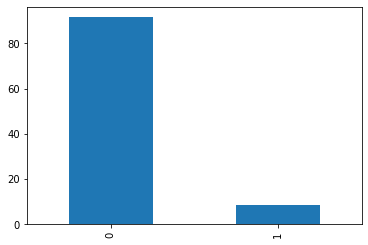

In [103]:
#Plot the bar chart for churn
(hv_train['churn_probability'].value_counts(1)*100).plot(kind='bar')

## Bivariate Analysis:

In [104]:
def Bivariate_Plot(var1, var2):
    if dtype(var1) == 'numerical' and dtype(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (dtype(var1) == 'categorical' and dtype(var2) == 'numerical') or (dtype(var1) == 'numerical' and dtype(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

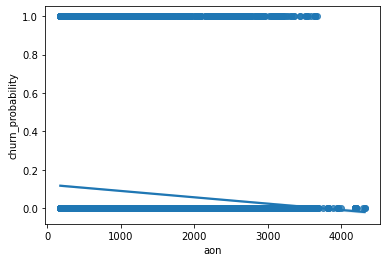

In [105]:
#Plot the chart for aon and churn probability
Bivariate_Plot(hv_train.aon,hv_train.churn_probability)

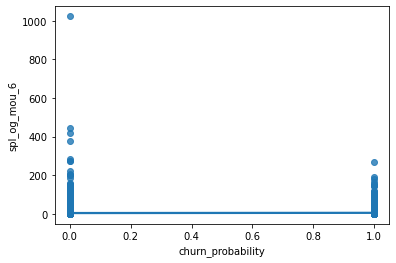

In [106]:
#Plot the chart for spl outgoing calls and churn probability
Bivariate_Plot(hv_train['churn_probability'],hv_train['spl_og_mou_6'])

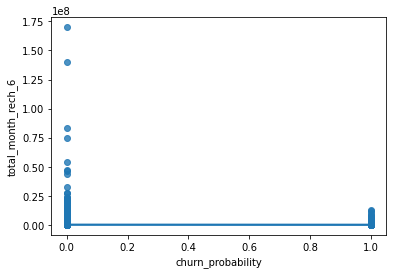

In [107]:
#Plot the chart for total monthly recharge and churn probability
Bivariate_Plot(hv_train['churn_probability'],hv_train['total_month_rech_6'])

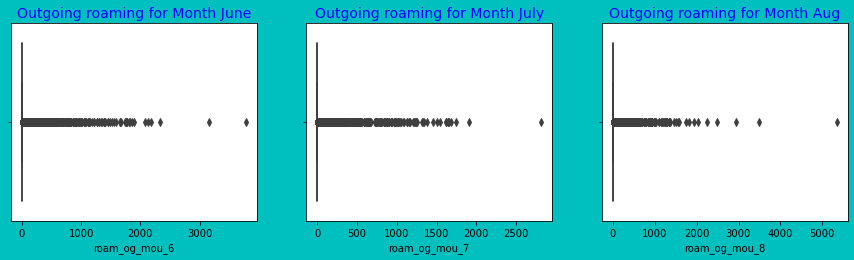

In [108]:
#Plot the chart for roaming users
plt.figure(figsize=(15,8),facecolor='c')
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_train['roam_og_mou_6'])
ax.set_title('Outgoing roaming for Month June',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_train['roam_og_mou_7'])
ax.set_title('Outgoing roaming for Month July',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(hv_train['roam_og_mou_8'])
ax.set_title('Outgoing roaming for Month Aug',fontsize=14,color='b')
plt.show()

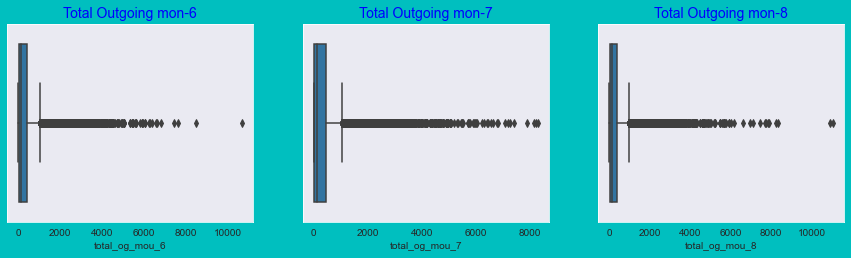

In [109]:
#Plot the chart for Total outgoing
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_train['total_og_mou_6'])
ax.set_title('Total Outgoing mon-6',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_train['total_og_mou_7'])
ax.set_title('Total Outgoing mon-7',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(hv_train['total_og_mou_8'])
ax.set_title('Total Outgoing mon-8',fontsize=14,color='b')
plt.show()

In [110]:
#Check the spread for the night package users with the churn probability
pd.crosstab(hv_train.churn_probability, hv_train.night_pck_user_8, normalize='columns')*100

night_pck_user_8        -1.0       0.0        1.0
churn_probability                                
0                  80.614896  96.92029  98.148148
1                  19.385104   3.07971   1.851852

In [111]:
#Check the spread for the fb users with the churn probability
pd.crosstab(hv_train.churn_probability, hv_train.fb_user_7, normalize='columns')*100

fb_user_7               -1.0        0.0        1.0
churn_probability                                 
0                  83.512127  91.933029  93.764614
1                  16.487873   8.066971   6.235386

In [112]:
#Check the percentage of the churn_probability
churn = (sum(hv_train['churn_probability'])/len(hv_train['churn_probability'].index))*100
churn

8.443661301076293

### Outlier Treatment:

<AxesSubplot:>

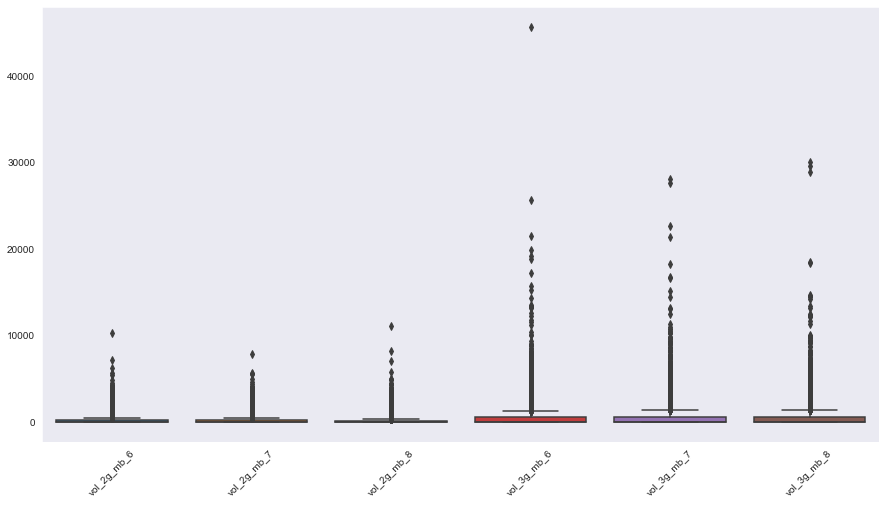

In [113]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = hv_train.filter(like='vol_'))

<AxesSubplot:>

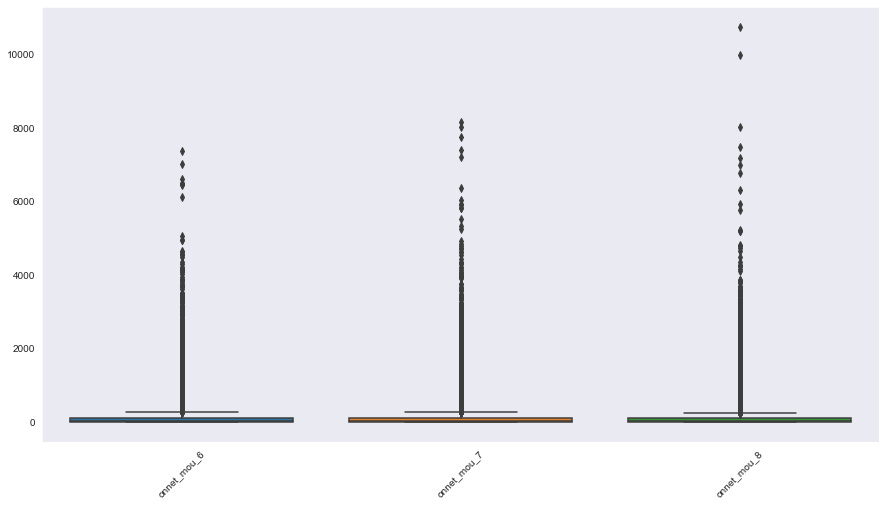

In [114]:
#Plot to check the outliers treatment
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = hv_train.filter(like='onnet_'))

<AxesSubplot:>

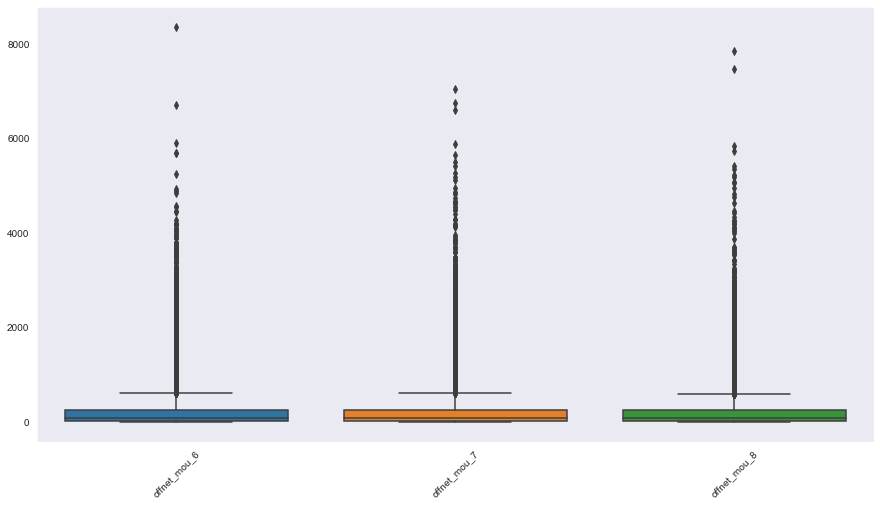

In [115]:
#Plot to check the outliers treatment
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = hv_train.filter(like='offnet_'))

We could lots of outliers in the data. So we need a method to treat the outliers for the numeric values.

### Outlier treatment using k-mean method:

In [116]:
#Define the capping outliers using k-mean method
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [117]:
#Filter the data
hv_train_filtered = hv_train
y = hv_train['churn_probability']
hv_train_filtered.drop(['churn_probability'], axis=1,inplace=True)
numeric_var = hv_train_filtered.select_dtypes(include=['int64','float64']).columns
hv_train_filtered[numeric_var] = hv_train_filtered[numeric_var].apply(cap_outliers, axis=0)

<AxesSubplot:>

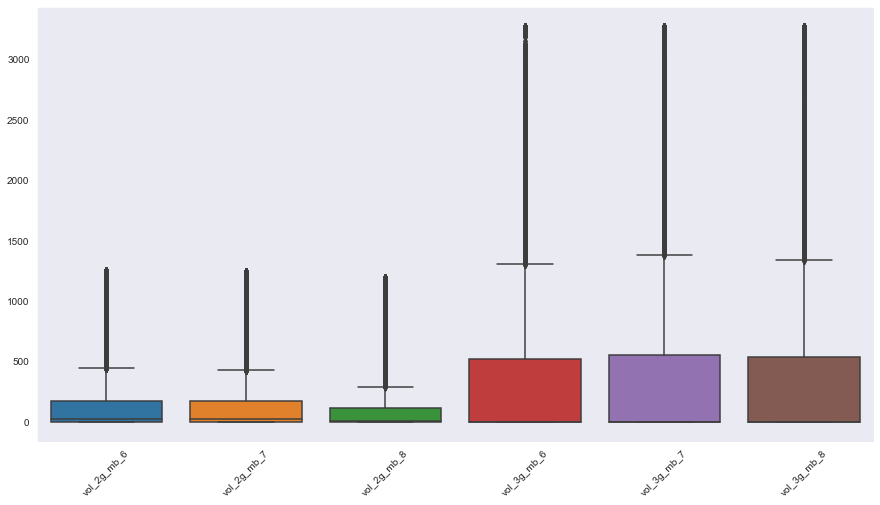

In [118]:
#Plot to check the outliers treatment
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = hv_train_filtered.filter(like='vol_'))

<AxesSubplot:>

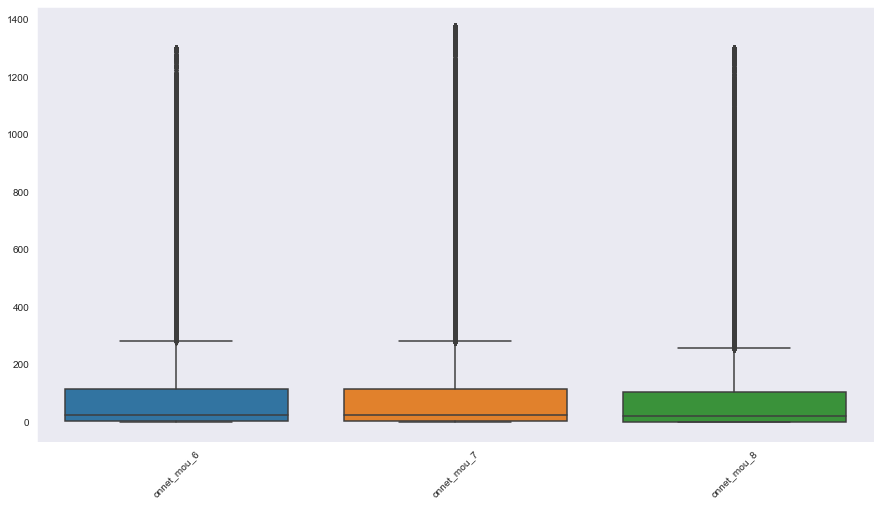

In [119]:
#Plot to check the outliers treatment
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = hv_train_filtered.filter(like='onnet_'))

<AxesSubplot:>

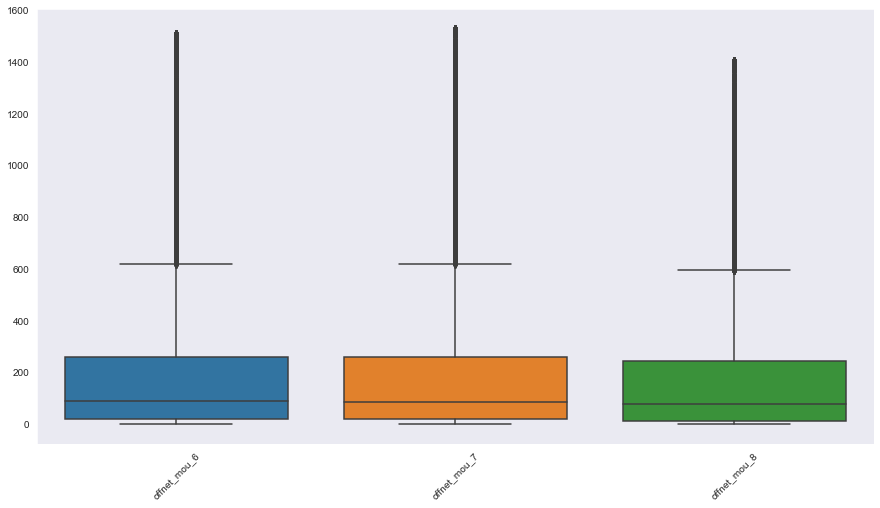

In [120]:
#Plot to check the outliers treatment
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = hv_train_filtered.filter(like='offnet_'))

We could see that outliers are treated well for the numerical data types.

In [121]:
#Drop categorical data from the train set
hv_train_filtered.drop(cat_var_cols,axis=1,inplace=True)

In [122]:
#Drop categorical data from the test set
test_df.drop(cat_var_cols,axis=1,inplace=True)

## Splitting Train Data:

In [123]:
X = hv_train_filtered
#y = hv_train['churn_probability']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

### Feature Scaling:
Using standard scaler for scaling the data set.

In [124]:
scaler = StandardScaler()

In [125]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

In [126]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1241
counts of label '0': 13457


## PCA Analysis:

In [127]:
#Perform the PCA analysis 
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train) #Fit the X_train data
pca_components = pca.fit_transform(X_train) #Fit and transform the data

In [128]:
#Check the principal components
pca.components_

array([[-5.15823051e-04,  1.63443510e-01,  1.70592990e-01, ...,
         2.55238198e-02,  3.03125898e-02,  2.89155368e-02],
       [ 3.60326103e-03,  2.07900293e-03,  5.33989202e-03, ...,
         1.36878801e-01,  1.42321663e-01,  1.37008434e-01],
       [-1.12516330e-03,  6.02056889e-02,  7.87963016e-02, ...,
         8.85350624e-02,  1.05903050e-01,  1.03201758e-01],
       ...,
       [ 2.23727260e-06,  6.91583962e-05, -1.33650377e-05, ...,
         3.87074995e-01,  3.94886801e-01,  4.40846022e-01],
       [-8.72380018e-07, -2.97618285e-05,  4.19003752e-05, ...,
        -5.52522020e-01,  5.23265940e-02,  4.38274341e-01],
       [ 1.45422319e-06,  4.44031837e-05, -2.17406383e-05, ...,
         2.12115210e-01, -5.84325703e-01,  3.37163196e-01]])

In [129]:
#Check for the variance ratio
pca.explained_variance_ratio_

array([1.46435800e-01, 1.02325682e-01, 6.64403823e-02, 5.37106287e-02,
       3.76997627e-02, 3.14010653e-02, 2.49190732e-02, 2.41315168e-02,
       2.20256565e-02, 2.06709062e-02, 1.95812496e-02, 1.91923818e-02,
       1.69630269e-02, 1.66229042e-02, 1.44376284e-02, 1.41853560e-02,
       1.35809725e-02, 1.33402337e-02, 1.24391032e-02, 1.17537836e-02,
       1.12766830e-02, 1.00935578e-02, 9.76708145e-03, 9.43176515e-03,
       9.13103729e-03, 8.53163777e-03, 8.20724013e-03, 7.92681512e-03,
       7.76495247e-03, 7.40988132e-03, 7.33868898e-03, 7.14333410e-03,
       6.82462314e-03, 6.69471106e-03, 6.55746397e-03, 6.46546796e-03,
       6.43943806e-03, 5.91172857e-03, 5.57862469e-03, 5.52667699e-03,
       5.24687970e-03, 5.07810163e-03, 4.84157409e-03, 4.76477374e-03,
       4.68951307e-03, 4.61870481e-03, 4.49587705e-03, 4.35281699e-03,
       4.09870377e-03, 3.93988586e-03, 3.79311505e-03, 3.69351908e-03,
       3.57035464e-03, 3.49655009e-03, 3.39888442e-03, 3.32296780e-03,
      

<AxesSubplot:>

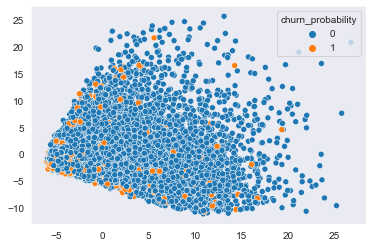

In [130]:
#Plot and see how the first and second principal component if spread out
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<AxesSubplot:>

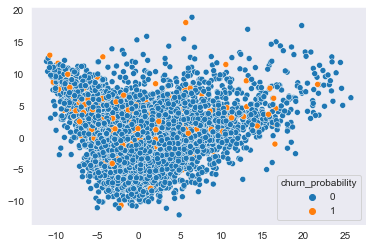

In [131]:
#Plot and see how the second and third principal component if spread out
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

###  Modeling with PCA using Random Forest:

In [132]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

RandomForestClassifier(n_jobs=-1)

<BarContainer object of 16 artists>

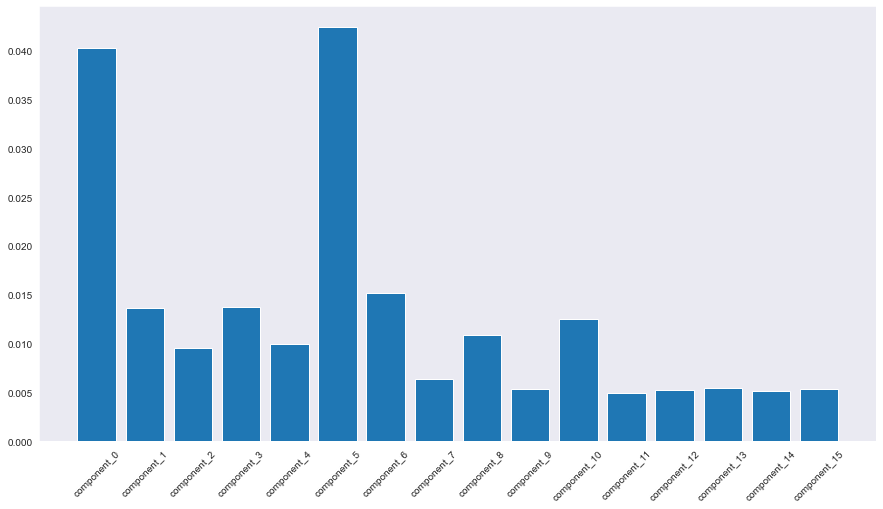

In [133]:
#Check the important features in the PCA
feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(16)], 
                                    'importance':rf.feature_importances_[:16]})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [134]:
#Find the cumulative sum of the PCA
var_cumu = np.cumsum(pca.explained_variance_ratio_)

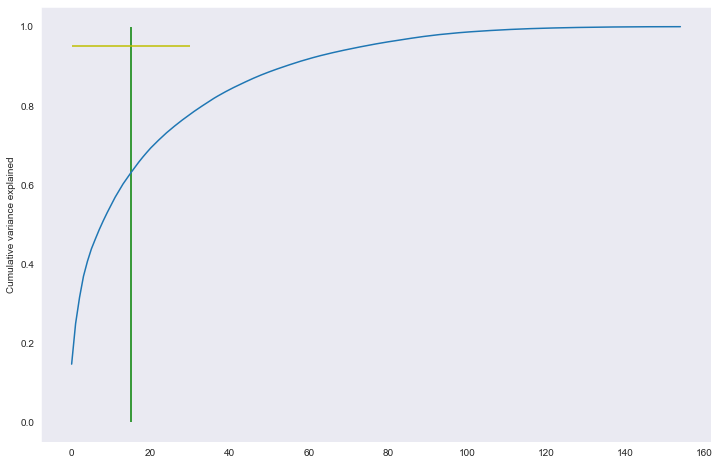

In [135]:
#PLot and see the cumulative variance explained
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="g", linestyles="-")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="y", linestyles="-")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Incremental PCA:

In [136]:
#Apply the incremental PCA for the selected features.
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)

In [137]:
#Check the shape of model
df_train_pca.shape

(14698, 16)

In [138]:
#Do the transpose for the correlation co-efficient
corrmat = np.corrcoef(df_train_pca.transpose())

In [139]:
#Check the shape
corrmat.shape

(16, 16)

In [140]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0038830034275435265 , min corr:  -0.004086116275029895


<AxesSubplot:>

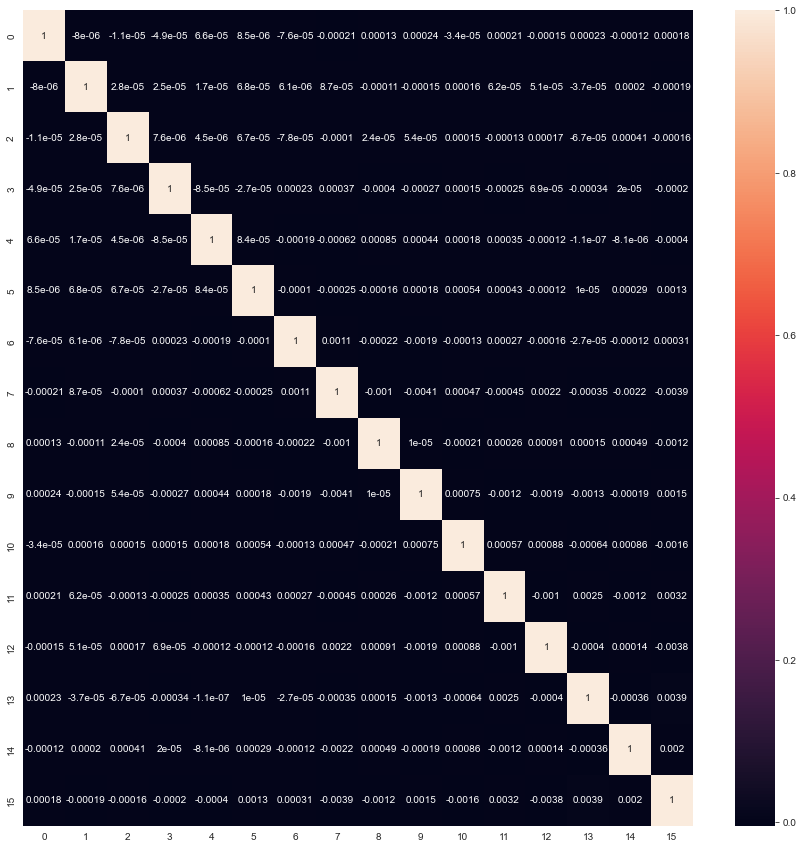

In [141]:
#Plot heatmap for the selected features of PCA
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [142]:
#Apply the transform for the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6300, 16)

### Model Building Using logistic regression with PCA:

In [143]:
#Build model using logistic regression
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:2], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [144]:
#Check the score
lr.score(pca_components[:,:2], y_train)

0.9155667437746632

### Pipeline Creation:

The steps of this pipeline would be the following, but this is only one type of pipeline -
1. Imputation
2. Scaling
3. PCA
4. Classification model

In [145]:
#Define the items for the pipeline
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=10,)
lr = LogisticRegression(max_iter=1000, tol=0.001,solver='sag')

In [146]:
#Define the pipeline
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [147]:
#Fit the pipeline for train data
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model',
                 LogisticRegression(max_iter=1000, solver='sag', tol=0.001))])

### Accuracy, Precision and Recall Score:

In [148]:
#Obtain the score for train data
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9181521295414342


In [149]:
#Obtain the score for test data
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9184126984126985


In [150]:
#Calculate confusion matrix
confusion_matrix(y_train, pipe.predict(X_train))

array([[13385,    72],
       [ 1131,   110]], dtype=int64)

In [151]:
#Calculate confusion matrix
confusion_matrix(y_test, pipe.predict(X_test))

array([[5733,   35],
       [ 479,   53]], dtype=int64)

In [152]:
#Calculate precision score
precision_score(y_test, pipe.predict(X_test))

0.6022727272727273

In [153]:
#Calculate recall score
recall_score(y_test, pipe.predict(X_test))

0.09962406015037593

## Decision Trees (Random Forest Method):
Let us use decision trees to determine the important features that determine the churn ratio of the customers using Random Forest Method.

### Tuning Max_depth:

In [154]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [155]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.497274      0.026074         0.031385        0.003421   
1       2.903160      0.041153         0.038736        0.003118   
2       2.991040      0.019457         0.041006        0.001441   
3       2.987021      0.018080         0.037802        0.003526   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              10  {'max_depth': 10}           0.923469           0.918367   
1              15  {'max_depth': 15}           0.924150           0.920068   
2              20  {'max_depth': 20}           0.925850           0.921088   
3              25  {'max_depth': 25}           0.924150           0.923469   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.921088           0.919701           0.922423         0.921010   
1           0.922109           0.918340           0.921062         0.921146   
2           0.923810           0.920381           0.925485         0.923323   
3           0.922789           0.923443           0.925145         0.923799   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001830                4            0.950247            0.952713   
1        0.001949                3            0.989709            0.993366   
2        0.002234                2            0.999745            0.999830   
3        0.000799                1            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.952713            0.951952            0.951697   
1            0.991580            0.989625            0.990731   
2            0.999830            0.999915            1.000000   
3            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.951864         0.000905  
1          0.991002         0.001383  
2          0.999864         0.000087  
3          1.000000         0.000000

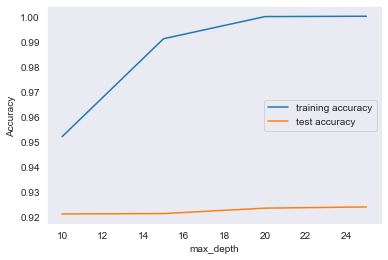

In [156]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above diagram, we could see that max_depth could be 20. After max_depth is 20, it becomes constant.

### Tuning n_estimator:

In [157]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=20)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [158]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.530776      0.018535         0.021206        0.000403   
1       2.317421      0.030128         0.032011        0.001268   
2       3.092915      0.036640         0.040439        0.000496   
3       3.759033      0.045818         0.051008        0.001675   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.921088   
1                 75   {'n_estimators': 75}           0.923129   
2                100  {'n_estimators': 100}           0.923469   
3                125  {'n_estimators': 125}           0.923469   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.920748           0.922109           0.918680           0.924804   
1           0.921429           0.921429           0.921062           0.925145   
2           0.918027           0.922449           0.921062           0.925145   
3           0.919728           0.922789           0.921062           0.924464   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.921486        0.001999                4            0.999150   
1         0.922439        0.001532                1            0.999405   
2         0.922030        0.002405                3            0.999830   
3         0.922302        0.001699                2            0.999830   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999575            0.999064            0.999405   
1            0.999660            0.999745            0.999660   
2            0.999915            0.999915            1.000000   
3            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.999745          0.999388         0.000255  
1            0.999830          0.999660         0.000142  
2            0.999830          0.999898         0.000064  
3            1.000000          0.999966         0.000068

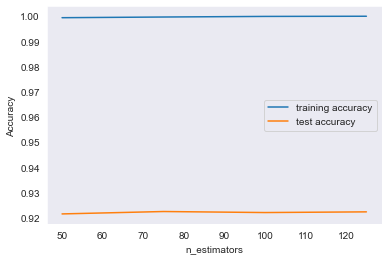

In [159]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimators looks good for 100.

### Tuning for max_features:

In [160]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.076267      0.038071         0.046414        0.008884   
1       6.043212      0.084110         0.039609        0.002671   
2      10.905479      0.249049         0.042459        0.003407   
3      12.594534      0.280694         0.040155        0.000492   
4      12.550618      0.291567         0.038533        0.003128   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.925850   
1                  8   {'max_features': 8}           0.925850   
2                 14  {'max_features': 14}           0.922449   
3                 20  {'max_features': 20}           0.924150   
4                 24  {'max_features': 24}           0.922449   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.918027           0.920748           0.920721           0.923443   
1           0.920408           0.924490           0.920721           0.926506   
2           0.918367           0.926190           0.919020           0.927526   
3           0.920068           0.926531           0.920721           0.926165   
4           0.915646           0.923469           0.919701           0.927186   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.921758        0.002668                4            0.999830   
1         0.923595        0.002560                1            0.999915   
2         0.922711        0.003684                3            0.999745   
3         0.923527        0.002691                2            0.999660   
4         0.921690        0.003858                5            0.999830   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            0.999745            1.000000   
1            0.999915            1.000000            0.999830   
2            0.999745            0.999745            0.999745   
3            0.999830            0.999064            0.999745   
4            0.999830            0.999320            0.999660   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          0.999915         0.000108  
1            0.999830          0.999898         0.000064  
2            0.999490          0.999694         0.000102  
3            0.999405          0.999541         0.000277  
4            0.999405          0.999609         0.000212

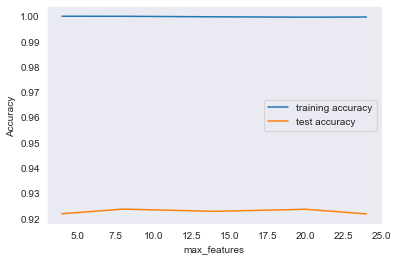

In [162]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_features looks good for 8.

### Tuning min_samples_leaf:

In [163]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=100,max_features=8)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=8),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [164]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.653054      0.028048         0.028006    1.907349e-07   
1       3.309279      0.027520         0.026764    4.866019e-04   
2       3.093717      0.026449         0.025207    3.998296e-04   
3       2.923043      0.040111         0.024408    4.881142e-04   
4       2.760051      0.015269         0.024000    7.164627e-06   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.917347   
1                    150  {'min_samples_leaf': 150}           0.915306   
2                    200  {'min_samples_leaf': 200}           0.915306   
3                    250  {'min_samples_leaf': 250}           0.915306   
4                    300  {'min_samples_leaf': 300}           0.915306   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.916327           0.917007           0.916979           0.915958   
1           0.915986           0.915646           0.915618           0.915618   
2           0.915646           0.915646           0.915618           0.915618   
3           0.915646           0.915646           0.915618           0.915618   
4           0.915646           0.915646           0.915618           0.915618   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.916723        0.000506                1            0.917503   
1         0.915635        0.000216                2            0.915632   
2         0.915567        0.000131                3            0.915632   
3         0.915567        0.000131                3            0.915632   
4         0.915567        0.000131                3            0.915632   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.919629            0.918098            0.918020   
1            0.915972            0.915547            0.915639   
2            0.915547            0.915547            0.915554   
3            0.915547            0.915547            0.915554   
4            0.915547            0.915547            0.915554   

   split4_train_score  mean_train_score  std_train_score  
0            0.915639          0.917778         0.001284  
1            0.915554          0.915669         0.000156  
2            0.915554          0.915567         0.000033  
3            0.915554          0.915567         0.000033  
4            0.915554          0.915567         0.000033

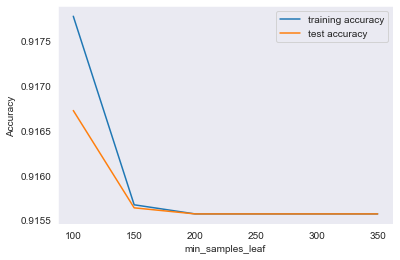

In [165]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf looks good for 150.

### Tuning min_samples_split:

In [166]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=100,max_features=8,min_samples_leaf=150)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=8,
                                              min_samples_leaf=150),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [167]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.332391      0.029237         0.026606         0.00049   
1       3.329092      0.033433         0.026406         0.00049   
2       3.346272      0.026096         0.026607         0.00049   
3       3.325787      0.023657         0.026606         0.00049   
4       3.341549      0.019513         0.026606         0.00049   

  param_min_samples_split                      params  split0_test_score  \
0                      50   {'min_samples_split': 50}           0.915306   
1                     100  {'min_samples_split': 100}           0.915306   
2                     150  {'min_samples_split': 150}           0.915306   
3                     200  {'min_samples_split': 200}           0.915306   
4                     250  {'min_samples_split': 250}           0.915306   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.915646           0.915646           0.915618           0.915618   
1           0.915646           0.915646           0.915618           0.915618   
2           0.915986           0.915646           0.915618           0.915618   
3           0.915986           0.915646           0.915618           0.915618   
4           0.915986           0.915646           0.915618           0.915618   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.915567        0.000131                4            0.915632   
1         0.915567        0.000131                4            0.915632   
2         0.915635        0.000216                1            0.915632   
3         0.915635        0.000216                1            0.915632   
4         0.915635        0.000216                1            0.915632   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.915547            0.915547            0.915724   
1            0.915632            0.915632            0.915639   
2            0.915547            0.915547            0.915639   
3            0.915547            0.915547            0.915554   
4            0.915547            0.915632            0.915639   

   split4_train_score  mean_train_score  std_train_score  
0            0.915554          0.915601         0.000070  
1            0.915554          0.915618         0.000032  
2            0.915554          0.915584         0.000042  
3            0.915554          0.915567         0.000033  
4            0.915554          0.915601         0.000041

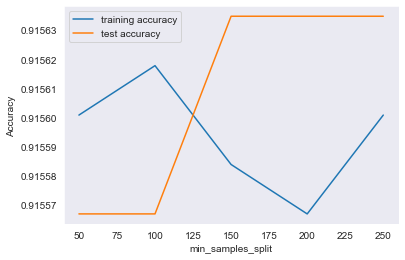

In [168]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_split looks good for 100.

### Tuning RF with best hyper parameters:

In [169]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=150, 
                             min_samples_split=100,
                             max_features=8,
                             n_estimators=100,
                             random_state=10)

In [170]:
# fit
rf_pca=rfc.fit(df_train_pca,y_train)
#Predict on training set
rtrain_predictions = rf_pca.predict(df_train_pca)
rtrain_predprob = rf_pca.predict_proba(df_train_pca)[:,1]

### Accuracy, Recall and AUC Score:

In [171]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train, rtrain_predprob))

Accuracy : 0.5075808060736269
Recall/Sensitivity : 0.015310233682514102
AUC Score (Train): 0.8856378543481411


In [172]:
#lets predict on test dataset
pred_probs_test = rf_pca.predict(df_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.5055524125848602
precision score: 0.8571428571428571
Sensitivity/Recall : 0.011278195488721804
Specificity: 0.9998266296809986
False Positive Rate: 0.00017337031900138697
Positive predictive value: 0.8571428571428571
Negative Predictive value: 0.9164150643572223
Accuracy : 0.9163492063492064


- Recall/Sensitivity score need to be considered in this case study as Telecom company will not like any high value customer to churn so will try to find out all high value customers who may leave in future. 
- As we can see that Train Recall score of Random forest is better than Logistics Regression but Test Recall score of Logistics Regression is better as compared to Random forest. Difference in between Train and test score is less for Logistics Regression which seems model is stable.

### Modelling Random Forest with best hyper parameters:

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100,stratify = y)

In [174]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100],
    'max_features': [4, 8, 14, 20, 24],
    'min_samples_split' : [50,100,150,200,250]
}

In [175]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [176]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 3000 candidates, totalling 12000 fits
CPU times: total: 1min
Wall time: 26min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [4, 8, 14, 20, 24],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'min_samples_split': [50, 100, 150, 200, 250],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [177]:
grid_search.best_score_

0.9457069904717468

In [178]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=5,
                       min_samples_split=200, n_estimators=25, n_jobs=-1,
                       random_state=42)

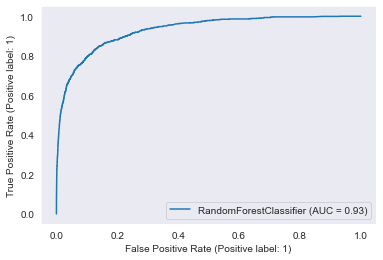

In [180]:
#Plot the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [181]:
rf_best.feature_importances_

array([3.52911315e-04, 1.67239355e-03, 1.11046775e-03, 6.80641781e-02,
       1.43043729e-03, 4.95322145e-04, 3.91868512e-03, 2.33099532e-03,
       1.05358670e-03, 1.00510244e-02, 6.36134936e-05, 1.79823030e-04,
       2.78326803e-03, 1.93976536e-04, 2.95081979e-04, 1.30302344e-02,
       8.88281159e-04, 8.06879741e-05, 3.66119848e-02, 4.10878947e-04,
       5.46763834e-04, 2.93547021e-02, 4.94682366e-05, 0.00000000e+00,
       6.90922659e-04, 0.00000000e+00, 6.60093577e-04, 0.00000000e+00,
       2.33686646e-03, 3.99781648e-03, 4.99477589e-02, 7.24214091e-04,
       2.71800322e-04, 5.88434691e-04, 4.44133569e-05, 6.97158875e-04,
       0.00000000e+00, 0.00000000e+00, 1.00923300e-04, 0.00000000e+00,
       1.23308340e-03, 5.40641316e-04, 9.60450321e-04, 2.45028066e-04,
       1.17459743e-05, 3.75763624e-04, 0.00000000e+00, 2.53143059e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.66291080e-03, 1.79695057e-04, 7.09651271e-02, 2.86624303e-03,
      

In [182]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [183]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
81     total_ic_mou_8  0.120043
66       loc_ic_mou_8  0.109989
54     total_og_mou_8  0.070965
3              arpu_8  0.068064
30       loc_og_mou_8  0.049948
..                ...       ...
36   std_og_t2m_mou_8  0.000000
83       spl_ic_mou_7  0.000000
123         arpu_2g_8  0.000000
124  night_pck_user_6  0.000000
77       std_ic_mou_7  0.000000

[155 rows x 2 columns]

- We could see from above table that almost all the features of top 10 important features are from August month. Hence we need to focus on these features to identify high value customers who may churn in future.

In [184]:
#See the test data
test_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0               0.0

In [185]:
submission_data = test_df
submission_data.shape

(30000, 155)

In [186]:
test_df['churn_probability'] = grid_search.predict(test_df[imp_df['Varname']])

In [187]:
output = test_df[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [188]:
output.to_csv('submission_tchurn_13jul.csv',index=False)

In [189]:
output['churn_probability'].value_counts()

0    27551
1     2449
Name: churn_probability, dtype: int64

In [190]:
sample['churn_probability'].value_counts()

0    26941
1     3059
Name: churn_probability, dtype: int64

### Important features from the August month:
1.  loc_ic_t2t_mou_8 : Local incoming calls Operator T to T Minutes of Usage
2.	total_ic_mou_8	: Total incoming calls Minutes of Usage
3.	total_og_mou_8	: Total outgoing calls Minutes of Usage
4.	loc_ic_t2m_mou_8 : Local Incoming calls Operator T to other operator mobile Minutes of usage
5.	loc_ic_mou_8	: Local Incoming call Minutes of usage
6.	total_rech_amt_8 : Total recharge amount
7.	onnet_mou_8	: Online network of Minute of Usage
8.	loc_og_t2t_mou_8 : Local Outgoing calls from operator to operator Minute of Usage
9.	loc_og_t2m_mou_8 : Local Outgoing calls from operator to mobile Minute of usage
10. max_rech_data_8 : MAximum recharge for data

### Business Insights
- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone. </br>
- Based on the above important features, reduced usage of the mobile either for call or data is a clear indication of churn. </br>
- Also watch out recharge amount of the data and calls and the total amount for the reacharge for calls and data. If it decreases or doesnt happen, it is indication that user might churn.
- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages. </br>
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.